In [475]:
import scipy as sp
Amp = 1
betap = -100
tau0 = 4.66
gamma = 1/tau0
beta = (betap*gamma**4)/(1+betap**2 * gamma **4)
omega_s = 3.24
if t<0:
    alpha = -1*beta
else:
    alpha = beta

In [471]:
def pulse_s(t):
    import scipy as sp
    Amp = 1
    betap = -100
    tau0 = 4.66
    gamma = 1/tau0
    beta = (betap*gamma**4)/(1+betap**2 * gamma **4)
    omega_s = 3.24
    Tau = tau0**2*(1+betap**2 * gamma**4)
    shape = Amp*sp.exp(-1*(t**2)/Tau)
    return shape*sp.cos(omega_s*t + 0.5 *1* beta*t**2)

In [466]:
def pulse_p(t):
    import scipy as sp
    Amp = 1
    betap = -100
    tau0 = 4.66
    gamma = 1/tau0
    beta = (betap*gamma**4)/(1+betap**2 * gamma **4)
    if t<0:
        alpha = -1*beta
    else:
        alpha = beta
    omega_s = 3.24
    Tau = tau0**2*(1+betap**2 * gamma**4)
    shape = Amp*sp.exp(-1*(t**2)/Tau)
    return shape*sp.cos(omega_s*t + 0.5 *1* alpha*t**2)

In [586]:
beta

-0.009549668859876065

In [604]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
time = np.linspace(-50, 50, 1001)
result = [pulse_p(t) for t in time]

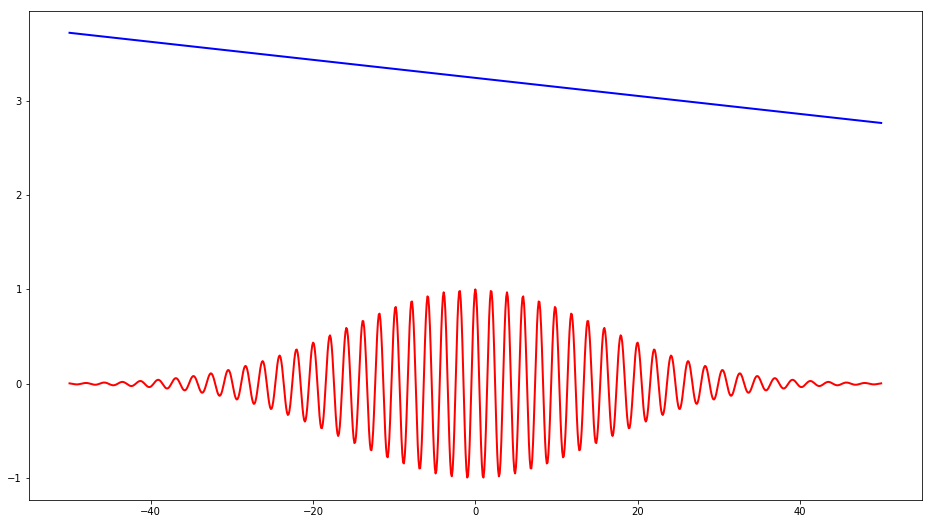

In [605]:
plt.figure(figsize = (16,9))
plt.plot(time,result, color = 'red', linewidth = 2)
plt.plot(time, omega_s + alpha*time, color = 'blue', linewidth = 2);

In [572]:
import pandas as pd
power = 12
tot_num = 2**power
t_tot_num = 2**(power-4)
boundary = int(tot_num/4)
times = np.linspace(-40,40,t_tot_num)
output_time = []
output_frequency = []
output_signal = []
temp_result = [0]*tot_num
tim = times + 40
freq = np.linspace(0,40, boundary)
maxout = 0

for time in times:
    cur_result = []
    def compul(tau):
        return pulse_s(time+0.5*tau) * np.conj(pulse_s(time-0.5*tau))
    taus = np.linspace(-2500,2500,tot_num)
    taustep = 3000/(tot_num-1)
    #comval = compul(taus)
    comval = [compul(ttau) for ttau in taus]
    cur_result = np.fft.fft(comval)
    cur_result = np.abs(cur_result)
    for i in range(tot_num):
        if i < tot_num/2 :
            temp_result[i + int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-5 else 0
        else:
            temp_result[i - int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-5 else 0
    output_signal.extend(list(temp_result[:boundary]))
    maxout = max(temp_result[:boundary]) if max(temp_result[:boundary])>maxout else maxout
    #if max(abs(cur_result[:boundary])) > maxout: maxout = max(output_signal)
#print(maxout)
print(output_signal.index(max(output_signal)))
output_signal = np.reshape(np.array(output_signal)/maxout, (t_tot_num, boundary))
freq, tim = np.meshgrid(freq, tim)
    

130580


In [564]:
output_signal.shape

(256, 1024)

In [571]:
(np.argmax(output_signal)%256)*256

5120

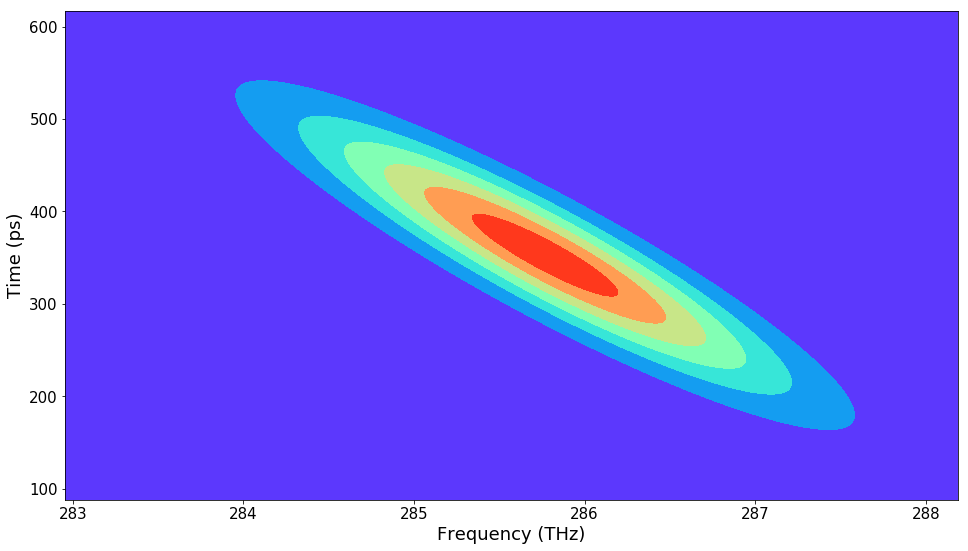

In [602]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,9))
plt.xticks(np.arange(10.178,30,3.822), (283,284,285,286,287,288))
plt.yticks(np.linspace(0,79.38,8), (0,100,200,300,400,500,600,700))
plt.xlim((10,30))
plt.ylim((10,70))
plt.contourf(freq,tim,output_signal, cmap=plt.get_cmap('rainbow'))
plt.xlabel('Frequency (THz)', fontsize = 18)
plt.ylabel('Time (ps)', fontsize = 18)
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
    

plt.savefig('wignerst.pdf')

In [77]:
type(df.Signal)

pandas.core.series.Series

In [78]:
df.to_csv('wigner_1.csv', sep = ",", index = False)

In [559]:
def pulse(t):
    import scipy as sp
    Amp = 1
    beta = -0.4
    tau0 = 20
    omega_s = 23.6
    Tau = tau0**2
    shape = Amp*sp.exp(-1*(t**2)/Tau)
    return shape*sp.cos(omega_s*t)


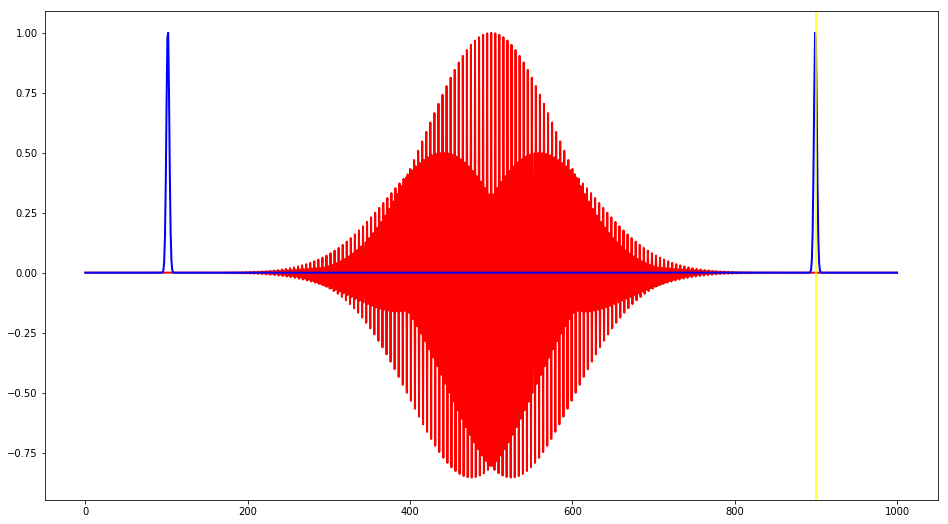

In [560]:
numm = 1001
time = np.linspace(-80, 80, numm)
temp_result = [0] * len(time)
result = [pulse(t) for t in time]
fre_re = np.abs(np.fft.fft(result))
for i in range(len(time)):
    if i < len(time)/2 :
        temp_result[i + int(len(time)/2)] = fre_re[i] if abs(fre_re[i]) > 1e-5 else 0
    else:
        temp_result[i - int(len(time)/2)] = fre_re[i] if abs(fre_re[i]) > 1e-5 else 0
plt.figure(figsize = (16,9))
plt.plot(range(numm),result, color = 'red', linewidth = 2)
plt.plot(range(numm),temp_result/max(temp_result), color = 'blue', linewidth = 2)
plt.axvline(x = 900, color = 'yellow');
#plt.xlim((-2.5,2.5))

##### power = 8
tot_num = 2**power
times = np.linspace(-20,20,tot_num)
output_time = []
output_frequency = []
output_signal = []
temp_result = [0]*tot_num
tim = times + 20
freq = np.linspace(0,(tot_num-1)/40, tot_num)
maxout = 0

for time in times:
    cur_result = []
    def compul(tau):
        return pulse(time+0.5*tau) * np.conj(pulse(time-0.5*tau))
    taus = np.linspace(-20,20,tot_num)
    taustep = 40/(tot_num-1)
    comval = compul(taus)
    cur_result = np.fft.fft(comval)
    cur_result = np.abs(cur_result)
    for i in range(tot_num):
        if i < tot_num/2 :
            temp_result[i + int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-3 else 0
        else:
            temp_result[i - int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-3 else 0
    output_signal.extend(list(temp_result))
    if max(cur_result) > maxout: maxout = max(output_signal)
output_signal = np.reshape(np.array(output_signal)/maxout, (tot_num, tot_num))
freq, tim = np.meshgrid(freq, tim)
fig = plt.figure(figsize=(16,9))
#ax = Axes3D(fig)
plt.contourf(freq,tim,output_signal, cmap=plt.get_cmap('rainbow'))
#ax.plot_surface(freq,tim,output_signal, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
#plt.xlim((2,4.5))
plt.ylim((10,30))

In [263]:
output_signal

array([[ -2.76298161e-31,   2.50002817e-26,   1.00070735e-25, ...,
          2.25425334e-25,   1.00070740e-25,   2.50002865e-26],
       [ -3.90628435e-31,   5.43554227e-26,   2.17554419e-25, ...,
          4.90002041e-25,   2.17554419e-25,   5.43554227e-26],
       [ -8.19366960e-31,  -9.53497332e-26,  -3.81574182e-25, ...,
         -8.59185470e-25,  -3.81574163e-25,  -9.53497332e-26],
       ..., 
       [ -1.52440365e-31,   2.77436128e-26,   1.10994726e-25, ...,
          2.49813991e-25,   1.10994726e-25,   2.77436319e-26],
       [  2.85825684e-32,  -6.12188976e-26,  -2.44982065e-25, ...,
         -5.51610893e-25,  -2.44982056e-25,  -6.12188976e-26],
       [ -9.52752279e-33,  -9.96763718e-27,  -3.98856475e-26, ...,
         -8.97997320e-26,  -3.98856451e-26,  -9.96763718e-27]])

In [265]:
0 if False else 3

3

In [587]:
np.arange(14,30,3.822)

array([ 14.   ,  17.822,  21.644,  25.466,  29.288])